## Exam Score 1 Vs Exam Score 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.loadtxt('new data/ex2data1.txt', delimiter=',')
print(f"Shape of the data is: {data.shape}")
print(data[1:4, :])

Shape of the data is: (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]]


Text(0.5, 1.0, 'Admitted or Not')

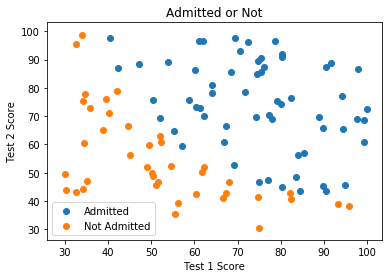

In [3]:
admitted_idx = data[:, 2] == 1
not_admitted_idx = data[:, 2] == 0

plt.scatter(data[admitted_idx, 0], data[admitted_idx, 1], label="Admitted")
plt.scatter(data[not_admitted_idx, 0], data[not_admitted_idx, 1], label="Not Admitted")
plt.legend()
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")
plt.title("Admitted or Not")

In [4]:
X_train = data[:80, 0:2].T # To make it of shape (features, total_examples)
Y_train = data[:80, 2].reshape((1, 80))
X_test = data[80:, 0:2].T
Y_test = data[80:, 2].reshape((1, 20))
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(2, 80) (1, 80) (2, 20) (1, 20)


- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyze the results and conclude

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    sigmoid(z)
    """
    return 1 / (1 + np.exp(-z))

def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)"""
    
    w = np.zeros((dim, 1))
    b = 0
    return w, b

w, b = initialize_params(2)
print(f"Initial W: \n {w} \nInitial B: \n {b}")

Initial W: 
 [[0.]
 [0.]] 
Initial B: 
 0


## Forward and Backward Propagation

In [6]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (2, 1)
    b -- bias, a scalar
    X -- data of size (2, 80) Train
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    m_examples = X.shape[1]
    # Forward propagation
    activations = sigmoid(np.dot(w.T, X) + b) # compute ACTIVATIONS
    cost = (-1/m_examples) * np.sum(Y*np.log(activations) + (1 - Y) * (np.log(1 - activations))) # Compute COST
    dz = activations - Y
    dw = (1/m_examples) * np.dot(X, dz.T)
    db = (1/m_examples) * np.sum(dz)
    
    gradients = {"dw": dw, "db": db}
    return gradients, cost
    


- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.


In [7]:
def optimize(w, b, X, Y, iters, alpha, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    """
    for i in range(iters):
        costs = []
        # Cost and Gradient Calculation
        grads, cost = propagate(w, b, X, Y)
        # Get the gradients
        dw = grads["dw"]
        db = grads["db"]
        # Update gradients
        w = w - (alpha * dw)
        b = b - (alpha * db)
        
        #costs.append(cost)
        if i % 10 == 0:
            print(f"Cost after {i} iterations is {cost}")
            
    params = {"w":w, "b":b}
    grads = {"dw": dw, "db": db}
    
    return params, grads
    

In [11]:
params, grads = optimize(w, b, X_train, Y_train, iters=100, alpha=0.001)

Cost after 0 iterations is 0.6931471805599454
Cost after 10 iterations is 0.6831518903946343
Cost after 20 iterations is 0.6795975922036285
Cost after 30 iterations is 0.6777762453242555
Cost after 40 iterations is 0.6766985018982704
Cost after 50 iterations is 0.6760109290561727
Cost after 60 iterations is 0.6755489292203452
Cost after 70 iterations is 0.6752246015131331
Cost after 80 iterations is 0.6749872372190057
Cost after 90 iterations is 0.6748061129233696


In [15]:
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    

{'w': array([[ 0.00446668],
        [-0.00143099]]),
 'b': -0.007473273549055036}

In [14]:
grads

{'dw': array([[4.3802544 ],
        [4.47575529]]),
 'db': 0.14133805008030356}